### Importing the necessary libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing and Reading data from the file

In [18]:
data= pd.read_csv('breastcancer.csv')
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Preprocessing the data

Here we are mapping the columns where there are characters to numbers in order to be able to use the data for developing the model. We also check for null values. Since null values are absent we do not preprocess any further.

In [19]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [20]:
d={'M':1, 'B':0}
data['diagnosis']=data['diagnosis'].map(d)

In [21]:
data.drop(columns=['id'], inplace=True)


In [22]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Assign variables

In [23]:
x= data.iloc[:, 1:].values
y= data.iloc[:, 0:1].values
print(y)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]


### Scaling the data

In [25]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x=sc.fit_transform(x)

### Splitting the data into train and test sets

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, random_state=0, test_size=0.2)

### Importing libraries required for developing the neural network

In [27]:
import keras
from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

### Building the model

In [33]:
model= Sequential()
model.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=30))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Training the model

In [35]:
y1= model.fit(x_train, y_train, epochs=100, batch_size=30, validation_data=(x_test, y_test))


Train on 455 samples, validate on 114 samples
Epoch 1/100
455/455 [==============================] - 0s 545us/step - loss: 0.6905 - accuracy: 0.6659 - val_loss: 0.6866 - val_accuracy: 0.6404
Epoch 2/100
455/455 [==============================] - 0s 74us/step - loss: 0.6779 - accuracy: 0.7648 - val_loss: 0.6631 - val_accuracy: 0.8596
Epoch 3/100
455/455 [==============================] - 0s 105us/step - loss: 0.6373 - accuracy: 0.9165 - val_loss: 0.5973 - val_accuracy: 0.9386
Epoch 4/100
455/455 [==============================] - 0s 173us/step - loss: 0.5466 - accuracy: 0.9407 - val_loss: 0.4739 - val_accuracy: 0.9211
Epoch 5/100
455/455 [==============================] - 0s 88us/step - loss: 0.4073 - accuracy: 0.9495 - val_loss: 0.3336 - val_accuracy: 0.9123
Epoch 6/100
455/455 [==============================] - 0s 85us/step - loss: 0.2749 - accuracy: 0.9560 - val_loss: 0.2362 - val_accuracy: 0.9123
Epoch 7/100
455/455 [==============================] - 0s 98us/step - loss: 0.1923 - a

455/455 [==============================] - 0s 82us/step - loss: 0.0377 - accuracy: 0.9912 - val_loss: 0.1254 - val_accuracy: 0.9474
Epoch 56/100
455/455 [==============================] - 0s 77us/step - loss: 0.0375 - accuracy: 0.9912 - val_loss: 0.1274 - val_accuracy: 0.9474
Epoch 57/100
455/455 [==============================] - 0s 74us/step - loss: 0.0369 - accuracy: 0.9912 - val_loss: 0.1305 - val_accuracy: 0.9474
Epoch 58/100
455/455 [==============================] - 0s 77us/step - loss: 0.0363 - accuracy: 0.9912 - val_loss: 0.1319 - val_accuracy: 0.9474
Epoch 59/100
455/455 [==============================] - 0s 83us/step - loss: 0.0357 - accuracy: 0.9912 - val_loss: 0.1327 - val_accuracy: 0.9474
Epoch 60/100
455/455 [==============================] - 0s 69us/step - loss: 0.0353 - accuracy: 0.9912 - val_loss: 0.1344 - val_accuracy: 0.9474
Epoch 61/100
455/455 [==============================] - 0s 80us/step - loss: 0.0348 - accuracy: 0.9912 - val_loss: 0.1332 - val_accuracy: 0.947

### Evaluating the model

In [41]:
y1.history.keys()


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [56]:
loss_value= y1.history['val_loss']
accuracy_val=y1.history['val_accuracy']
loss=y1.history['loss']
accuracy=y1.history['accuracy']

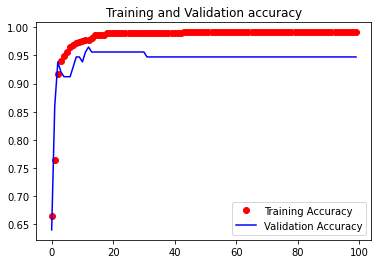

In [57]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'ro', label='Training Accuracy')
plt.plot(epochs, accuracy_val, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


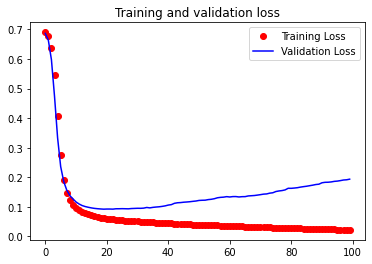

In [59]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, loss_value, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Predicting the results

In [43]:
y_pred= model.predict(x_test)
y_pred = (y_pred > 0.5) 
y_pred

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [

In [45]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[64,  3],
       [ 3, 44]])

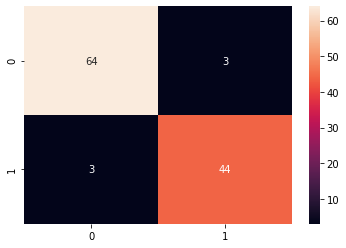

In [48]:
import seaborn as sns
sns.heatmap(cm, annot=True)

### Printing the accuracy

In [60]:
print("Accuracy Score:",round((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])*100,2))

Accuracy Score: 94.74


### End of project